In [1]:
import numpy as np
import pandas as pd
import processi_EMGIT as em

import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf,adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

Calcolo di W e ottimizzazione per Hurst exponent per Modulus Wiener volatility
 =======
 H=1/3.818182

In [2]:

s=em.gbm_mod(100,1,23400)
r2=em.calcolaRendimenti(s[0],len(s[0]))
f=em.realVol(r2,10,23400)
#f=em.RV(s[0],len(s[0]))
diff=np.zeros(len(f))
for i in range(len(f)):
    diff[i]=(s[1][i]-f[i])
#r2=em.calcolaRendimenti(s[0],len(s[0]))


In [3]:
#REALIZED VOL PER MOD
P=np.linspace(1,10)
w=np.zeros(len(P))
Hrmod=[]
for p in range(len(P)):
    Hrmod.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.W(f,2339,30,P[p])-1)**2
min(w)
data=pd.DataFrame(w,index=Hrmod,columns=['W()'])
data['P']=P
data[ data['W()'] <= min(w) ]



,W(),P
0.153605,0.002528,6.510204


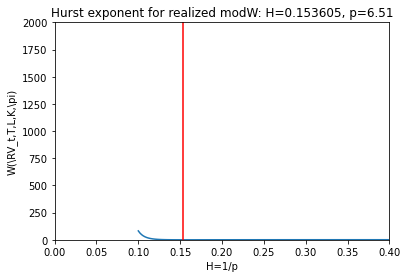

In [4]:
plt.plot(Hrmod,w)
plt.xlabel('H=1/p')
plt.ylabel('W(\RV_t,T,L,K,\pi)')
#plt.annotate('Minimum', xy=(0.264865, 0.), xytext=(0.264865, 0.1),arrowprops=dict(facecolor='black', shrink=0.05))
#plt.axis([0.2, 0.3, 0, 0.5])
plt.title('Hurst exponent for realized modW: H=0.153605, p=6.51')
plt.axis([0.0, 0.4, -0.05, 2000])
plt.axvline(x=0.15364	, ymin=0.0, ymax=7,color='r')

plt.show()

In [5]:
#INSTANT VOL PER MOD
P=np.linspace(1,3,100)
w=np.zeros(len(P))
Hrsig=[]
for p in range(len(P)):
    Hrsig.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.W_1(s[1],23398,300,P[p])-1)**2
min(w)
datasig=pd.DataFrame(w,index=P,columns=['W()_sig'])
datasig[ datasig['W()_sig'] == min(w) ]


,W()_sig
2.030303,0.000271


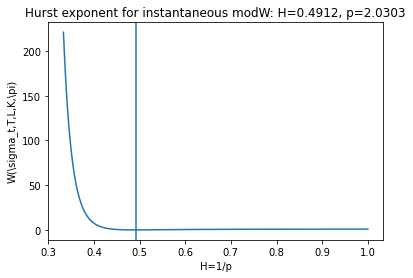

In [6]:
#torna perchè il minimo è 2? NI
plt.plot(Hrsig,w)
plt.xlabel('H=1/p')
plt.ylabel('W(\sigma_t,T,L,K,\pi)')
plt.title('Hurst exponent for instantaneous modW: H=0.4912, p=2.0303')
#plt.axis([0.3, 0.8, -0.005, 1.2])
plt.axvline(x=1/2.030303, ymin=0.0, ymax=7)

plt.show()

Calcolo di W e ottimizzazione per Hurst exponent per Exp OU volatility
 =======

In [7]:
s=em.gbm_expOU(100,1,23400)
r2=em.calcolaRendimenti(s[0],len(s[0]))
#fOU=em.RV_5min(s[0],1,len(s[0]))
r2=em.calcolaRendimenti(s[0],len(s[0]))
fOU=em.realVol(r2,10,23400)
diff=np.zeros(len(f))
for i in range(len(f)):
    diff[i]=(s[1][i]-f[i])

In [8]:
P=np.linspace(1,10)
w=np.zeros(len(P))
Hrou=[]
for p in range(len(P)):
    Hrou.append(1/P[p])
for p in range(len(P)):
    w[p]=np.linalg.norm(em.W_1(fOU,2339,10,P[p]))**2
min(w)
dataOU=pd.DataFrame(w,index=P,columns=['W()'])
dataOU['H']=Hrou
dataOU[ dataOU['W()'] <= min(w)]


,W(),H
1.0,0.010824,1.0


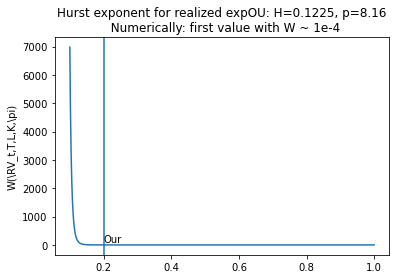

In [9]:
# H=1/7.979591 ultima volta prima che arrivi a 1e-8
plt.plot(Hrou,w)
#plt.plot('H=1/p')
plt.ylabel('W(\RV_t,T,L,K,\pi)')
#plt.annotate('Cont-Das', xy=(0.15, 0.015), xytext=(0.15, 0.015))#,arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Our', xy=(0.2, 105), xytext=(0.2, 105))
plt.title('Hurst exponent for realized expOU: H=0.1225, p=8.16\n  Numerically: first value with W ~ 1e-4')
#plt.axis([0.1, 0.4, -0.005, 0.03])
plt.axvline(x=0.2, ymin=0.0, ymax=7)
plt.vlines(x=0.15, ymin=-0.006, ymax=7,colors='r')
plt.show()

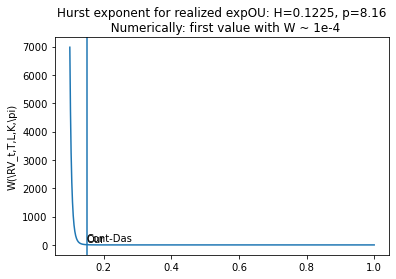

In [10]:
# H=1/7.979591 ultima volta prima che arrivi a 1e-8
plt.plot(Hrou,w)
#plt.plot('H=1/p')
plt.ylabel('W(\RV_t,T,L,K,\pi)')
plt.annotate('Cont-Das', xy=(0.15, 115), xytext=(0.15, 115))#,arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Our', xy=(0.15, 105), xytext=(0.15, 105))
plt.title('Hurst exponent for realized expOU: H=0.1225, p=8.16\n  Numerically: first value with W ~ 1e-4')
#plt.axis([0.1, 0.4, -0.005, 0.03])
plt.axvline(x=0.15, ymin=0.0, ymax=7)
plt.vlines(x=0.15, ymin=0.0, ymax=7,colors='r')
plt.show()

In [11]:
#sssss=np.linalg.norm(em.W(s[1],23398,300,2.))**2
#sssss

s=em.gbm_expOU(100,1,23400)
P=np.linspace(1,3)
w=np.zeros(len(P))
for p in range(len(P)):
    w[p]=np.linalg.norm(em.W_1(s[1],23398,300,P[p])-1)**2
min(w)
#
H=[]
for p in range(len(P)):
    H.append(1/P[p])
datasigOU=pd.DataFrame(w,index=P,columns=['W()_sigOU'])
datasigOU[ datasigOU['W()_sigOU'] == min(w) ]


,W()_sigOU
2.061224,0.000023


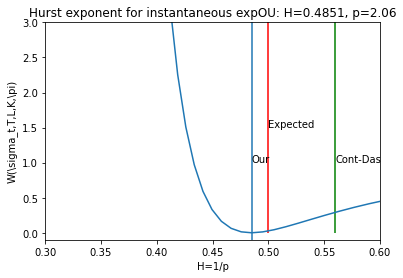

In [12]:
plt.plot(H,w)
plt.xlabel('H=1/p')
plt.ylabel('W(\sigma_t,T,L,K,\pi)')
plt.annotate('Expected', xy=(0.5, 0), xytext=(0.5, 1.5))#,arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate('Cont-Das', xy=(0.56, 0), xytext=(0.56, 1))
plt.annotate('Our', xy=(0.4851486301343279, 0), xytext=(0.4851486301343279, 1))
#plt.axhline(y=0, xmin=0.1, xmax=0.9)
plt.title('Hurst exponent for instantaneous expOU: H=0.4851, p=2.06')
plt.axis([0.3, 0.6, -0.1, 3])
plt.axvline(x=0.4851486301343279, ymin=0.0, ymax=7)
plt.vlines(x=0.5, ymin=0, ymax=7,colors='r')
plt.vlines(x=0.56, ymin=0, ymax=7,colors='g')
plt.show()
#data
#P=np.linspace(1,10,100)
#ws=np.zeros(len(P))
#for p in range(len(P)):
#    ws[p]=np.linalg.norm(em.W_1(s[1],23398,300,P[p]))**2
#min(ws)
#data=pd.DataFrame(ws,index=P,columns=['Ws()'])
#data[ data['Ws()'] <= min(ws) ]

In [13]:
#logify = lambda arr: np.log(arr)
#dataOU.apply(logify).plot()
#plt.show()
#datasigOU.apply(logify).plot()
#plt.show()

In [14]:
#plt.semilogx(dataOU)
##invert_xaxis()
##plt.invert_yaxis()
#plt.show()
#plt.semilogx(datasigOU)
#plt.show()

In [15]:
#logw=np.zeros(len(w))
#hurst=np.zeros(len(P))
#for i in range(len(w)):
#    logw[i]=np.log(w[i])
#for i in range(len(P)):
#    hurst[i]=1/P[i]
#datatoplot=pd.DataFrame(logw,index=hurst,columns=['log(W)'])
#datatoplot.describe()